In [225]:
import yfinance as yf
import numpy as np
import pandas as pd

In [226]:
ETH= yf.download('ETH-USD', start="2021-07-10", end="2022-07-10") 

[*********************100%***********************]  1 of 1 completed


In [227]:
ETH.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-09,2115.573975,2185.376221,2051.066650,2146.692383,2146.692383,23029574602
2021-07-10,2146.999756,2190.124023,2081.923584,2111.403564,2111.403564,17581542471
2021-07-11,2110.875732,2172.653320,2083.803711,2139.664795,2139.664795,14705386138
2021-07-12,2140.506836,2167.710205,2011.018921,2036.721069,2036.721069,17768129077
2021-07-13,2034.098389,2040.693604,1922.577881,1940.083984,1940.083984,16621628658


In [228]:
ETH.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-05,1150.509766,1165.682739,1086.829956,1134.541016,1134.541016,16195518291
2022-07-06,1134.822266,1193.636719,1116.247559,1186.973999,1186.973999,15373536703
2022-07-07,1186.960938,1246.894897,1165.623169,1237.593384,1237.593384,14230795894
2022-07-08,1237.580322,1262.885742,1200.632202,1222.506226,1222.506226,16315929082
2022-07-09,1222.306885,1228.767944,1209.377563,1216.978271,1216.978271,8821353104


In [229]:
ETH['Adj Close'].tail(130) # ETH_6M 

Date
2022-03-02    2950.118408
2022-03-03    2834.468994
2022-03-04    2617.156006
2022-03-05    2664.831055
2022-03-06    2555.037354
                 ...     
2022-07-05    1134.541016
2022-07-06    1186.973999
2022-07-07    1237.593384
2022-07-08    1222.506226
2022-07-09    1216.978271
Name: Adj Close, Length: 130, dtype: float64

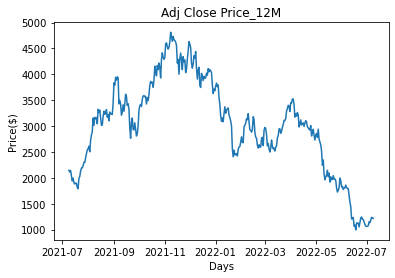

In [230]:
import matplotlib.pyplot as plt # Movement of the stock Adj Close price (12M)
fig = plt.figure()
plt.plot(ETH['Adj Close'])
plt.xlabel('Days')
plt.ylabel('Price($)')
plt.title('Adj Close Price_12M');

In [231]:
log_return_12M = np.log(ETH['Adj Close'] / ETH['Adj Close'].shift(1))
log_return_12M[:5]

Date
2021-07-09         NaN
2021-07-10   -0.016575
2021-07-11    0.013296
2021-07-12   -0.049308
2021-07-13   -0.048610
Name: Adj Close, dtype: float64

In [232]:
ETHvol = log_return_12M.std() * np.sqrt(365)
print('The annualised volatility over 12 months is', round(ETHvol * 100,2), '%')

The annualised volatility over 12 months is 83.9 %


In [233]:
# Cash-or-Nothing Binary put option (ETH-USD)
# Pricing methods

# 1 Binomial Tree Method

S0 =1168 # dated 10-07-2022
K = 1000
T = 1/12
r = 0.03 # risk free rate used 13th July 2022 12 month rate from Bloomberg
sigma = 0.839 # from calculated volatility (prior 12M period)
N = 10
payoff = "put"

In [234]:
dT = float(T) / N
u = np.exp(sigma * np.sqrt(dT))
d = 1 / u

In [235]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1
S

array([[1168.        , 1260.97187797, 1361.34424404, 1469.70617121,
        1586.69362224, 1712.99318202, 1849.34608706, 1996.5525757 ,
        2155.47658464, 2327.05081922, 2512.28222744],
       [   0.        , 1081.88296966, 1168.        , 1260.97187797,
        1361.34424404, 1469.70617121, 1586.69362224, 1712.99318202,
        1849.34608706, 1996.5525757 , 2155.47658464],
       [   0.        ,    0.        , 1002.11537675, 1081.88296966,
        1168.        , 1260.97187797, 1361.34424404, 1469.70617121,
        1586.69362224, 1712.99318202, 1849.34608706],
       [   0.        ,    0.        ,    0.        ,  928.22907512,
        1002.11537675, 1081.88296966, 1168.        , 1260.97187797,
        1361.34424404, 1469.70617121, 1586.69362224],
       [   0.        ,    0.        ,    0.        ,    0.        ,
         859.7904352 ,  928.22907512, 1002.11537675, 1081.88296966,
        1168.        , 1260.97187797, 1361.34424404],
       [   0.        ,    0.        ,    0.       

In [236]:
a = np.exp(r * dT)    # risk-free rate (compounded)
p = (a - d)/ (u - d)  # up
q = 1 - p           # down
p

0.48249256560165277

In [237]:
S_T = S[:,-1]
S_T

array([2512.28222744, 2155.47658464, 1849.34608706, 1586.69362224,
       1361.34424404, 1168.        , 1002.11537675,  859.7904352 ,
        737.6791232 ,  632.91060999,  543.02179313])

In [238]:
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.heaviside(S_T - K >0, 0.0)
elif payoff =="put":
    V[:,-1] = np.heaviside(K - S_T >0, 0.0)
V

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [239]:
for j in range(N - 1, -1, -1):
    for i in range(j + 1):
        V[i, j] = np.exp(- r * dT) * (p * V[i, j + 1] + q * V[i + 1, j + 1])
V

array([[0.20159959, 0.10806847, 0.04342787, 0.0099233 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.28889975, 0.16838765, 0.07468649, 0.01917998,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.4013975 , 0.2558303 , 0.12647348,
        0.03707149, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.53730948, 0.37655836,
        0.20988757, 0.07165262, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.68744368,
        0.53213403, 0.33887086, 0.1384918 , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.83257711, 0.712578  , 0.52585588, 0.26768007, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.

In [240]:
print('Binary ' + payoff, str( V[0,0]))

Binary put 0.20159959384517248


In [241]:
# 2 MONTE CARLO SIMULATION 

def mcs_simulation_np(m,n):  # m is 10 STEPS and n is 10000 simulations
    M = m
    I = n
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [242]:
S = mcs_simulation_np(10,10000)

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

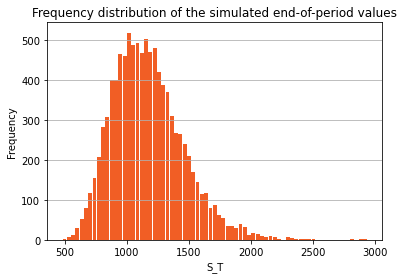

In [243]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[-1,:], bins='auto', color='#f15e25',alpha=1.0, rwidth=0.90)

plt.grid(axis='y', alpha=1.0)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')


In [244]:
pp = (K - S[-1,:])>0
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Monte Carlo: Binary put', str(bpp))

Monte Carlo: Binary put 0.2985


In [245]:
# 3 BLACK-SCHOLES METHOD

import scipy.stats as si

In [246]:
def binary_option_BS(S, K, T, r, sigma, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        option_value = np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) # binary call option value
    elif payoff == "put":
        option_value = np.exp(-r * T) * (1 - si.norm.cdf(d2, 0.0, 1.0)) # binary put option value
    
    return option_value

In [247]:
pp = binary_option_BS(1168, 1000, 1/12, 0.03, 0.839, "put")
pp

0.29717232044410674

In [248]:
cp = binary_option_BS(1168, 1000, 1/12, 0.03, 0.839, "call")
cp

0.7003308019533534

In [249]:
pp + cp # Put-Call Parity

0.9975031223974602

In [251]:
S = np.linspace(500,1500,11)
T = [1/52, 2/52, 3/52, 4/52]

In [252]:
pp = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        pp[i,j] = binary_option_BS(S[j], 1000, T[i], 0.03, 0.839, "put")

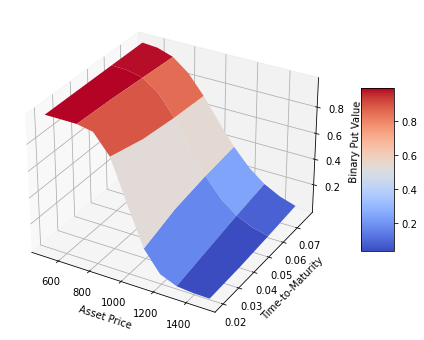

In [253]:
# Binary put option value

Asset_Price, TTM = np.meshgrid(S, T)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (10, 6))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(Asset_Price, TTM, pp, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Asset Price')
ax.set_ylabel('Time-to-Maturity')
ax.set_zlabel('Binary Put Value')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [254]:
# ANALYSIS

# GREEKS

# DELTA: rate of change of hypothetical option value with respect to changes in the underlying asset price

def delta(S, K, T, r, sigma, payoff):
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) / (sigma * (S) * np.sqrt(T))
    elif payoff == "put":
        delta = - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) / (sigma * (S) * np.sqrt(T))
    return delta

In [255]:
delta(1168, 1000, 1/12, 0.03, 0.839, "put")

-0.0012221390791185382

In [256]:
S = np.linspace(500,1500,11)
T = [1/52, 2/52, 3/52, 4/52] 

In [257]:
Delta_Put = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        Delta_Put[i,j] = delta(S[j], 1000, T[i], 0.03, 0.839, "put") 


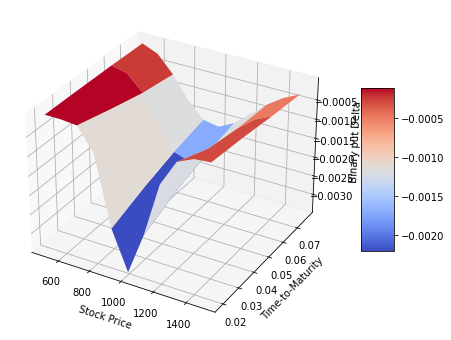

In [258]:
Stock, TTM = np.meshgrid(S, T)
fig = plt.figure(figsize= (10, 6))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(Stock, TTM, Delta_Put, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time-to-Maturity')
ax.set_zlabel('Binary put Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);


In [259]:
# GAMMA: rate of change in the delta with respect to changes in the underlying price

def gamma(S, K, T, r, sigma, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        gamma = - np.exp(-r * T) * d1 * si.norm.pdf(d2, 0.0, 1.0) / ((sigma ** 2) * (S ** 2)) * (np.sqrt(T))
    elif payoff == "put":
        gamma = np.exp(-r * T) * d1 * si.norm.pdf(d2, 0.0, 1.0) / ((sigma ** 2) * (S ** 2)) * (np.sqrt(T))
    return gamma

In [260]:
gamma(1168, 1000, 1/12, 0.03, 0.839, "put")

8.029532196395996e-08

In [261]:
S = np.linspace(500,1500,11)
T = [1/52, 2/52, 3/52, 4/52]

In [262]:
Gamma_Put = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        Gamma_Put[i,j] = gamma(S[j], 1000, T[i], 0.03, 0.839, "put") 

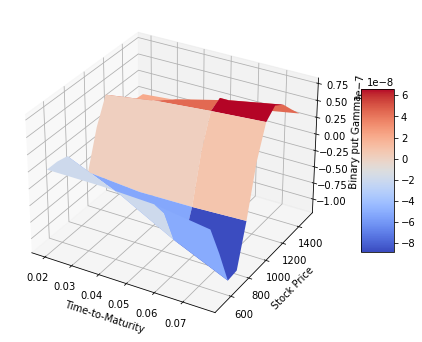

In [263]:
Stock, TTM = np.meshgrid(S, T)
fig = plt.figure(figsize= (10, 6))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(TTM, Stock, Gamma_Put, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Time-to-Maturity')
ax.set_ylabel('Stock Price')
ax.set_zlabel('Binary put Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);



In [264]:
S = np.linspace(500,1500,11)
Gamma_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma_Put[i] = gamma(S[i], 1000, 1/12, 0.03, 0.839, "put") 

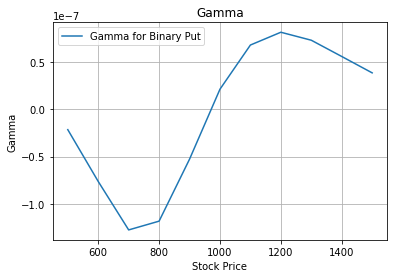

In [265]:
# gamma detail at expiry 

fig = plt.figure()
plt.plot(S, Gamma_Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Binary Put'])

In [266]:
# THETA: measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay"

def theta(S, K, T, r, sigma, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        theta = (r * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) + np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)) * ((d1 / 2 * T) - (r / sigma * np.sqrt(T)))
    elif payoff == "put":
        theta = (r * np.exp(-r * T) * (1 - si.norm.cdf(d2, 0.0, 1.0)) - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)) * ((d1 / 2 * T) - (r / sigma * np.sqrt(T)))
    return theta

In [267]:
theta(1168, 1000, 1/12, 0.03, 0.839, "put")

-0.007365974195309889

In [268]:
T = [1/52, 2/52, 3/52, 4/52]
S = np.linspace(500,1500,11)

In [269]:
Theta_Put = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        Theta_Put[i,j] = theta(S[j], 1000, T[i], 0.03, 0.839, "put")


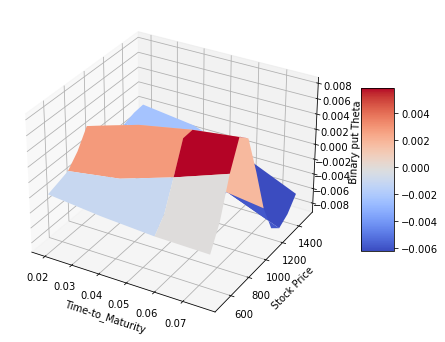

In [270]:
Stock, TTM = np.meshgrid(S, T)
fig = plt.figure(figsize= (10, 6))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(TTM, Stock, Theta_Put, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Time-to_Maturity')
ax.set_ylabel('Stock Price')
ax.set_zlabel('Binary put Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [271]:
# SPEED: measures the rate of change in Gamma with respect to changes in the underlying price

def speed(S, K, T, r, sigma, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        speed = - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) / ((sigma ** 2) * (S ** 3) * np.sqrt(T)) * ((-2 * d1) + (1 - (d1 * d2)) / (sigma * np.sqrt(T)))
    elif payoff == "put":
        speed = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) / ((sigma ** 2) * (S ** 3) * np.sqrt(T)) * ((-2 * d1) + (1 - (d1 * d2)) / (sigma * np.sqrt(T)))
    return speed

In [272]:
speed(1168, 1000, 1/12, 0.03, 0.839, "put")


9.520995617556296e-10

In [273]:
S = np.linspace(500,1500,11)
T = [1/52, 2/52, 3/52, 4/52]


In [274]:
Speed_Put = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        Speed_Put[i,j] = speed(S[j], 1000, T[i], 0.03, 0.839, "put")


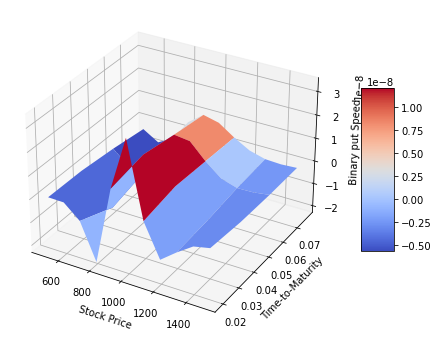

In [275]:
Stock, TTM = np.meshgrid(S, T)
fig = plt.figure(figsize= (10, 6))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(Stock, TTM, Speed_Put, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time-to-Maturity')
ax.set_zlabel('Binary put Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [276]:
S = np.linspace(500,1500,11)
Speed_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Speed_Put[i] = speed(S[i], 1000, 1/12, 0.03, 0.839, "put")

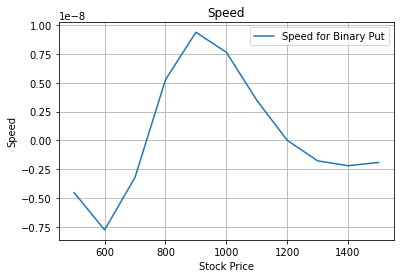

In [277]:
# speed detail at expiry 

fig = plt.figure()
plt.plot(S, Speed_Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Binary Put'])


In [278]:
# VEGA: measures sensitivity to volatility

def vega(S, K, T, r, sigma, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        vega = - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) * (d1 / sigma)
    elif payoff == "put":
        vega = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) * (d1 / sigma)
    return vega

In [279]:
vega(1168, 1000, 1/12, 0.03, 0.839, "put")

0.31836734322439963

In [280]:
sigma = np.linspace(0.10,1,13)
T =  [1/52, 2/52, 3/52, 4/52]


In [281]:
Vega_Put = np.zeros((len(T),len(sigma)))
for i in range(len(T)):
    for j in range(len(sigma)):
        Vega_Put[i,j] = vega(1168, 1000, T[i], 0.03, sigma[j], "put") 

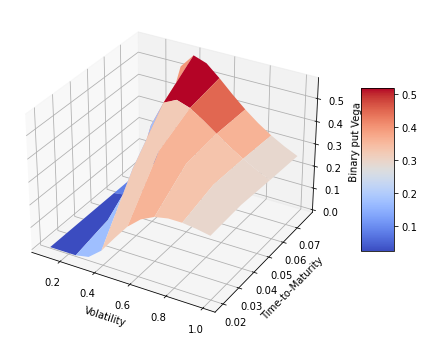

In [282]:
Vol, TTM = np.meshgrid(sigma, T)
fig = plt.figure(figsize= (10, 6))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(Vol, TTM, Vega_Put, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Volatility')
ax.set_ylabel('Time-to-Maturity')
ax.set_zlabel('Binary put Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [283]:
# RHO: measures sensitivity to the interest rate

def rho(S, K, T, r, sigma, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        rho =  - T * np.exp(-r * T) * si.norm.cdf(d2) + ((np.sqrt(T) / sigma) * (np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)))
    elif payoff == "put":
        rho =  - T * np.exp(-r * T) * (1 - si.norm.cdf(d2)) - ((np.sqrt(T) / sigma) * (np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)))
    return rho

In [284]:
rho(1168, 1000, 1/12, 0.03, 0.839, "put")

-0.14371923040454662

In [285]:
r = np.linspace(0,0.03,10)
T = [1/52, 2/52, 3/52, 4/52]


In [286]:
Rho_Put = np.zeros((len(T),len(r)))
for i in range(len(T)):
    for j in range(len(r)):
        Rho_Put[i,j] = rho(1168, 1000, T[i], r[j], 0.839, "put") 

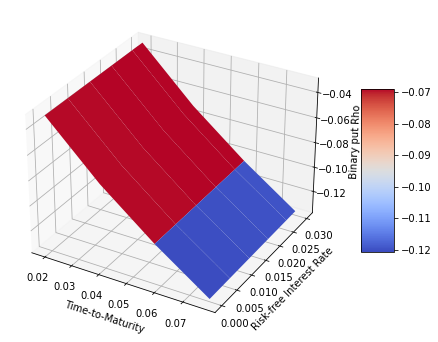

In [287]:
Int, TTM = np.meshgrid(r, T)
fig = plt.figure(figsize= (10, 6))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(TTM, Int, Rho_Put, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Time-to-Maturity')
ax.set_ylabel('Risk-free Interest Rate')
ax.set_zlabel('Binary put Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);
